This will be a study of the Seeds data set available through the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/index.php). Additional information on this data set and is available here: https://archive.ics.uci.edu/ml/datasets/seeds. The data set is very similar to Fisher's Iris data set. The target (or labels or dependent variable) fall into one of three classes just as in the Iris data set. The $n$, the number of observations (or points or rows), in the data set is very small. Iris contains 150 rows, whereas Seeds contains 210. The $p$, the number of salient features (or indepndent variables or columns) is a bit larger than in Iris. Iris has four features, whereas seats has seven. In both data sets, all of the features are numerical and continuous.

We begin by loading the libraries that comprise the Python numerical stack. Note that we have includes the IPython magic command `%matplotlib inline`. This will ensure that any images generated will be rendered within the notebook while we work.

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns

%matplotlib inline

# Load and Verify Data

We will load the data directly from a URL. The data is hosted in a whitespace-separated file on the UCI Machine Learning Repository. This file is available at the following URL: https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt. We first define a variable to hold this URL as a string. Note that I have named this variable using all caps. While this has no semantic meaning in Python, I have done this to signify that this string should be thought of as a constant. It is a value to be stored by the notebook that will never change.

In [2]:
UCI_BASE_URL = 'https://archive.ics.uci.edu/'
ML_REPO_URI = 'ml/machine-learning-databases/00236/seeds_dataset.txt'
SEEDS_URL = UCI_BASE_URL + ML_REPO_URI

Next, I use the `pd.read_csv()` method available as part of the Pandas library to to read the file into a `DataFrame`. A bit of special handling was required here. First, it is necessary to specify on load that the file has no header row. This is done using the argument `header=None`. Second, it is necessary to specify that this data is whitespace-separated. In other words, whitespace is used to separate the values in a row of data rather than the more conventional commas. This is done using the regular expression (regex). You can read more about regex here: https://developer.mozilla.org/en-US/docs/Web/JavaScript/Guide/Regular_Expressions} `\s+`. This argument signifies that one or more whitespace character(s) should be used as separator.

In [3]:
seeds_df = pd.read_csv(SEEDS_URL, header=None, sep='\s+')

Because no header row was specified it is necessary for us to manually specify the names of each column in our new `DataFrame`. These names were obtained from the attribute information section at the UCI Machine Learning Repository. Note that we have made all of the names computer-friendly by replacing whitespace with underscores.

In [4]:
seeds_df.columns = [
    "area",
    "perimeter",
    "compactness",
    "length_of_kernel",
    "width_of_kernel",
    "asymmetry_coefficient ",
    "length_of_kernel_groove",
    "seed_class" ]

As a means of verifying that the data was properly loaded, we display both the type and the shape of the `DataFrame` and the first five rows. This is done using the `type()` function, the `.shape` attribute, and the `.head()` method respectively. It is worth noting that `.shape` is an attribute and `.head()` is a method of the `Pandas.DataFrame` class, while `type()` is a Python builtin function.

As expected, `seeds_df` is a Pandas `DataFrame`. It has a shape of `(210, 8)`. This corresponds to a $n = 210$ and $p=7$, plus 1 target column. Looking at the first five rows of the `DataFrame`, it appears that everything has been loaded correctly.

In [5]:
type(seeds_df)

pandas.core.frame.DataFrame

In [6]:
seeds_df.shape

(210, 8)

In [7]:
seeds_df.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,seed_class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## Save Dataset as Local Files

So that we do not need to retrieve our data set from remote URL each time we work with it, we use the Pandas `DataFrame` methods, `.to_csv()` and `.to_pickle()`, to store local versions the downloaded file. Each of these takes a string as its argument. This string will be used as the name of the file to be saved locally.

While you are no doubt familiar with the CSV format, this may be the first time you are learning about the Pickle format. You can read more about this format here: https://docs.python.org/3/library/pickle.html. The Pickle format is a Python specific way to save information. When you write a `DataFrame` to disk as a Pickle you can load it in later, *exactly* as it was when you saved it. Furthermore, just like Pandas as the `pd.read_csv()` method, it also includes the method `pd.read_pickle()` to help you load a Pickled `DataFrame` at some later point.

In [8]:
seeds_df.to_csv('seeds.csv')

In [9]:
seeds_df.to_pickle('seeds.p')

## Verify Type Casting

During the loading process Pandas will explicitly cast each column into the most appropriate data type. Based on information available at the UCI machine learning repository page for this data set, we would expect the first seven columns to be floating-point, that is type `float`, and the eighth target column, `seed_class` to be categorical. Here we use the `.dtypes` attribute to display the data types of our `seeds_df` `DataFrame`.

We note that the first seven columns have been correctly cast, but `seed_class` has been incorrectly designated as type `int`. This is no doubt due to the fact that the `seed_class` categories are encoded numerically.

In [10]:
seeds_df.dtypes

area                       float64
perimeter                  float64
compactness                float64
length_of_kernel           float64
width_of_kernel            float64
asymmetry_coefficient      float64
length_of_kernel_groove    float64
seed_class                   int64
dtype: object

Using the `.unique()` method, we display the unique values of the `seed_class` column. Indeed, the seed classes, Kama, Rosa and Canadian, have been encoded as the numbers 1, 2, and 3. As all of the values are integers, Pandas incorrectly intuited that the column should be of type `int`.

In [11]:
seeds_df.seed_class.unique()

array([1, 2, 3])

We will need to correct this manually. We do so using the `.astype()` method. This method, applied to a column, returns a copy of that column cast into the requested data type. To complete the casting, we save this type-cast copy back as the original column.

This pattern resembles this:

    df.my_column = df.my_column.astype(#REQUESTEDTYPE#)
    

## Programming Method: Transform and Reassign a Variable

The programming pattern being used here is one that is fairly common. Here we take some variable, transform that variable, and then reassign the result to the original variable name. In the simplest sense, you might think about doing this with an integer

    my_int = 4
    my_int = my_int + 5
    
Of course, this pattern is so common that it has a shortcut that works in most popular programming languages

    my_int = 4
    my_int += 5
    
In general, where it is not necessary to keep incremental results of a variable, we use a pattern like this one. You might imagine doing the same in order to transform a Python `list` to a `numpy` array. 

    xx = [1,2,3]
    xx = np.array(xx)
    
Here we have made use of the transformation and reassignment programming pattern. We cast the list `xx` as a `np.array` and reassign this to the original `np.array`.

## Cast `seed_class` as a Pandas Column of type `category`

Here, we cast `seed_class` as the Pandas data type, category\footnote{https://pandas.pydata.org/pandas-docs/stable/categorical.html}.

In [12]:
seeds_df.seed_class = seeds_df.seed_class.astype('category')

Once more, we display the data types of our `seeds_df` `DataFrame`. We now see that the target column, `seed_class` is now correctly encoded as categorical.

In [13]:
seeds_df.dtypes

area                        float64
perimeter                   float64
compactness                 float64
length_of_kernel            float64
width_of_kernel             float64
asymmetry_coefficient       float64
length_of_kernel_groove     float64
seed_class                 category
dtype: object

# Exploratory Data Analysis

Next, we perform some exploratory data and analysis (EDA) on our data set. A simple yet powerful technique for beginning EDA is the Seaborn function `pairplot()`. Seaborn\footnote{https://seaborn.pydata.org} is a Python statistical data visualization library build on top of the popular visualization library `matplotlib`. Essentially, it gives us a simple API for rendering many common statistical plots. `pairplot` takes a `DataFrame` as argument and returns a `PairGrid` plot of the pairwise relationships between each of the variables in the passed `DataFrame`.

Note that the central diagonal axis is treated differently than others. It shows the univariate distribution plot of each feature. 

Note that it the plots above the central diagnoal axis are symmetric to the plot below the central diagonal axis and it is only necessary to examine one set of plots. 

## 

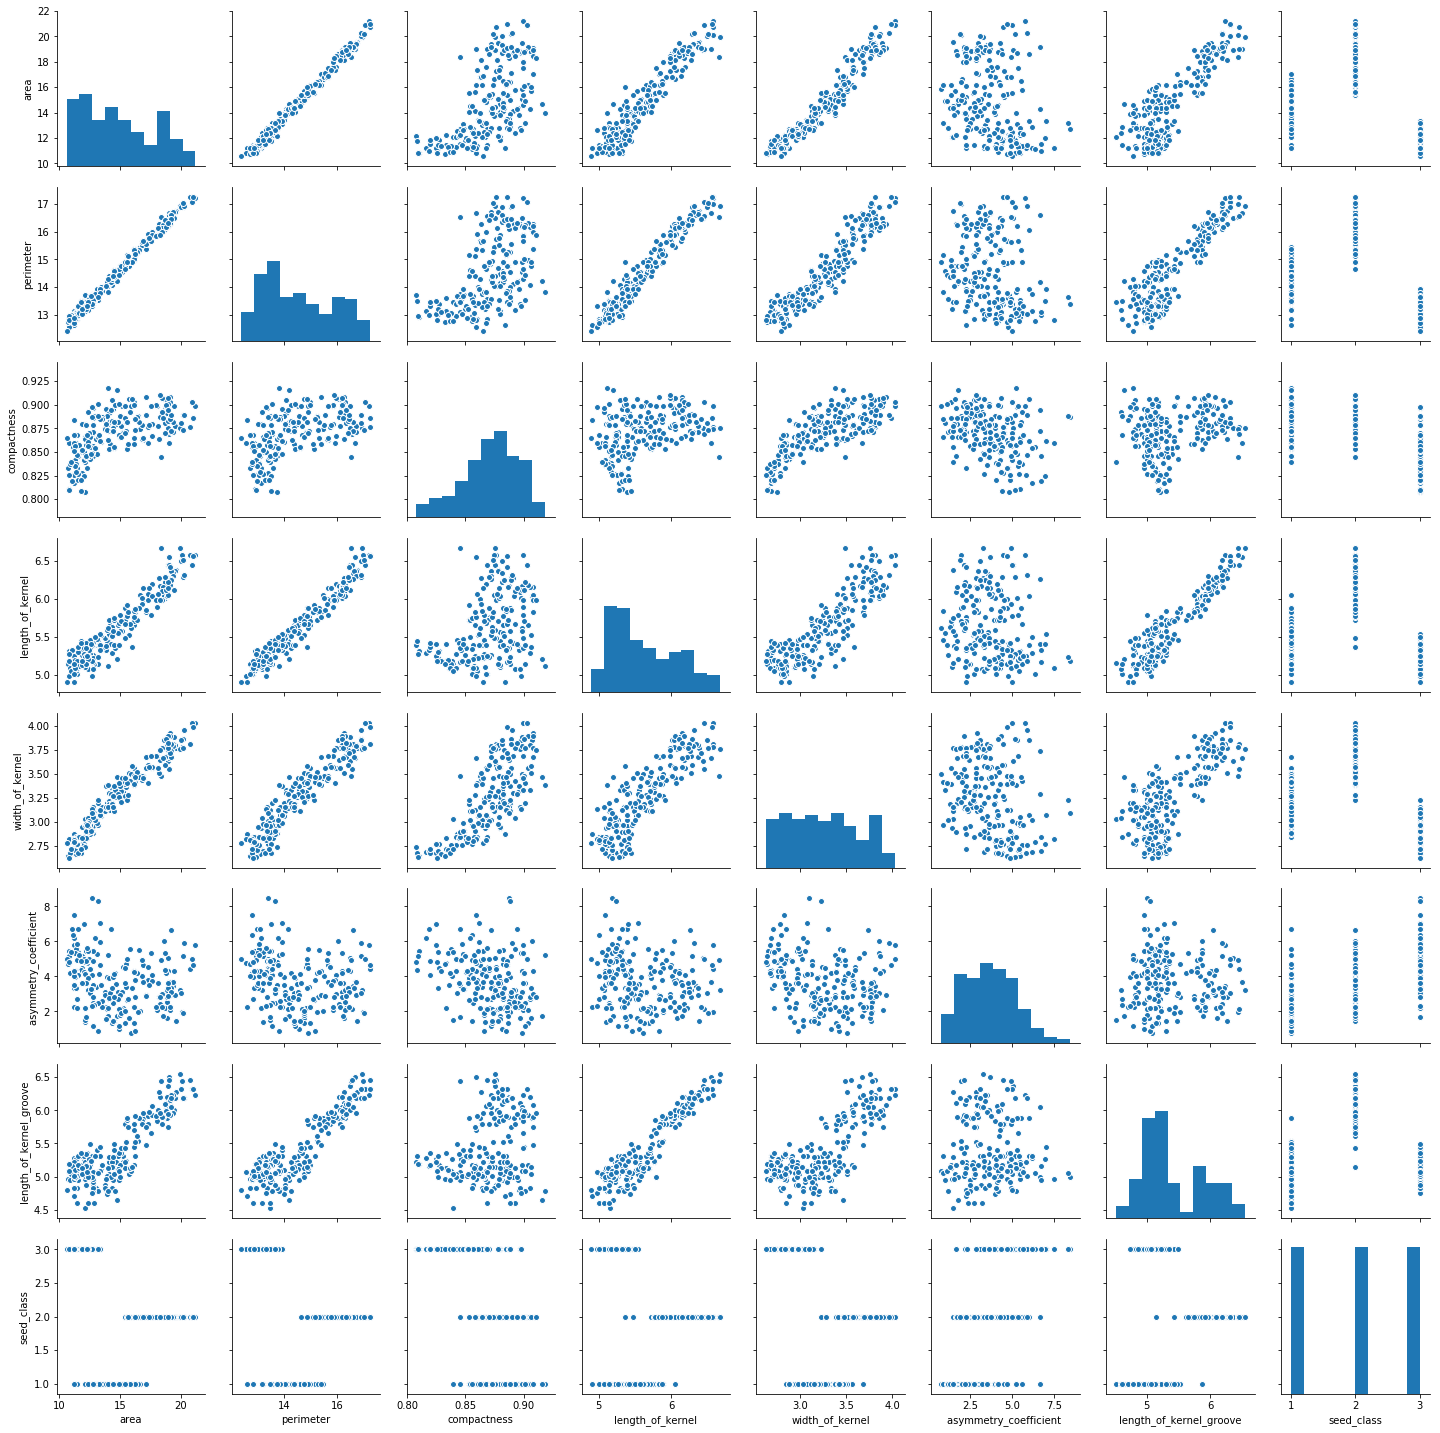

In [14]:
sns.pairplot(seeds_df)

### Interpretation

We make note of a few things in the `PairGrid`.

1. There are several highly linear relationships in this dataset, for example, `area`-`perimeter`, as shown here:

   ![](https://www.evernote.com/l/AAGuD0jUiz9N5JGeUBblec6_xtAO50OQ3W0B/image.png) 
   
   Note that there are other strongly linear relationships that are not as linear as area-perimeter, but are still strongly linear, e.g. `length_of_kernel`-`width_of_kernel`, as shown here:
   
   ![](https://www.evernote.com/l/AAGZUmPOEqFA_77bhJpd_c-tpeR-xtTDG80B/image.png)

1. While, there does not appear to be a clear linear separation between the classes there is some indication that we will be able to separate the classes by feature variables. Here, we can see that `area` may be a feature we can use to separate the classes:

   ![](https://www.evernote.com/l/AAHELGMqIztDd5mlXeJqDrEYK40uTBCpdx8B/image.png)

## Visualizing High-Dimensional Data

Given a data set with $p=7$, you can imagine that it will be difficult to visualize this data sets using conventional means. We are accustomed to looking at data in only two dimensions. We are able to visualize in three dimensions, but three-dimensional visualization is already significantly more difficult then two dimensional. And beyond that, we are out of luck. Luckily for us, there is a fairly simple, at least in implementation, method for visualizing high-dimensional data using a technique called a T-SNE. The math behind this technique\footnote{http://colah.github.io/posts/2014-10-Visualizing-MNIST/} can be fairly involved, but for our purposes it suffices to understand that we are creating a two-dimensional representation of our seven-dimensional features.

The implementation of takes only a few lines of code using the Python library, Scikit-Learn\footnote{http://scikit-learn.org/stable/}.

First, we create two subsets of our complete data set:
1. `features`, a `DataFrame` that includes everything but the target column
2. `target`, a `Series` or Pandas Column, that is just the target column

In [15]:
features = seeds_df.drop('seed_class', axis=1)
target = seeds_df.seed_class

Next, we import the model that we need from Scikit-Learn. The `TSNE` model is in the `sklearn.manifold` library. 

In [16]:
from sklearn.manifold import TSNE

Next, we create a `TSNE()` object named `tsne`. 

#### Programming Method: Classes and Objects

For those who are not familiar with object-oriented programming (OOP), this next step may be a bit of a challenge. Using the OOP paradigm, classes of objects are defined in code. To use a class, we must instantiate it as an object. To make this a bit more concrete, you might think of the class, Toyota Prius. This class is a kind of car, the definition of which exists in blueprints stored by the Toyota Corporation. The Prius that you drive, however, is not the class, but an object of the class Toyota Prius. It conforms to the definition as defined in the blueprints, but it is a specific instance of that class that you are driving around. 

We do the same thing here with `two_dim_model` and `TSNE()`. `TSNE()` is a class defined in the `sklearn.manifold` library. `two_dim_model` is an object of class `TSNE` that we will use to do our work. Here, I ask for a `TSNE` object with 2 components.

In [17]:
two_dim_model = TSNE(n_components=2)

Note, that if I request the type of my `two_dim_model` object it tells me that it is a `TSNE` object from the `sklearn.manifold` library.

In [18]:
type(two_dim_model)

sklearn.manifold.t_sne.TSNE

### Fit and Transform the Data

Next, I use the `two_dim_model` object to transform our data. The transformation that I am performing is to project the original data from seven dimensions to two dimensions. Note that in this case I am not interested in overwriting the original data with the transformation that I performed. For this reason I save the transform data as a new variable, `features_2d`. 

#### Programming Method: Fit and Transform

With `two_dim_model` we performed the "fit" and the "transformation" in one step using the method `.fit_transform()`. In this, `two_dim_model` learned the nature of the data, that is, it was "fit" to the data. Then we used the fit model to "transform" the data, resulting in the two-dimensional `np.array`, `featured_2d`.

In [19]:
features_2d = two_dim_model.fit_transform(features)

If we display the shape of each of the objects, indeed we can see that `features` has $p=7$, while `features_2d` has $p=2$.

In [20]:
features.shape, features_2d.shape

((210, 7), (210, 2))

Scikit-Learn Transformation objects always return `np.array` objects. I wish to continue to work with a Pandas `DataFrame`. For this reason, I turn `features_2d` into a `DataFrame`. I give the columns of the `DataFrame` the names `Component_1` and `Component_2`.

In [21]:
features_2d = pd.DataFrame(features_2d)
features_2d.columns = ['Component_1', 'Component_2']

### Visualize the Data

The file `visualization.py` includes a helper function `scatter_plot_by_class`. As the name suggests, this function returns a scatter plot of our data with each point labeled by it's class using color.

#### Programming Method: Import Functions From File

We have previously imported functions and classes from various libraries available to us. Here, for the first time, we import a function from a local file. This can be done by simply creating a file with the `.py` suffix in the current working directory. In this way, the Python interpreter will be able to easily locate the file and is able to import any functions or classes from that file as if they were part of our installed and configured Python libraries. 

In [22]:
from visualization import scatter_plot_by_class

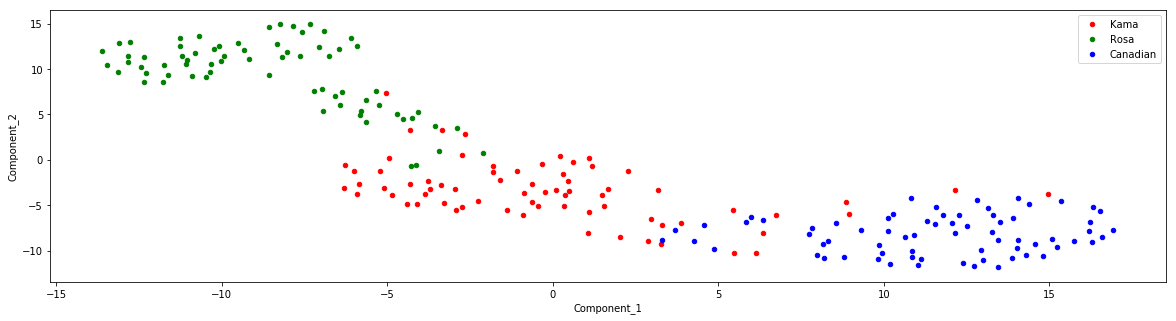

In [23]:
fig, ax = plt.subplots(1,1,figsize=(20,5))
scatter_plot_by_class(ax, features_2d, target)

### Interpretation

Note: TSNE is a randomized-process and your results may vary slightly from the results shown below.

The two-dimensional representation of the data suggests that we may be able to easily classify this data. We can see clear linear separations in the groupings of each of the three seed types:

![](https://www.evernote.com/l/AAGuD9chSkpLcKW7jv_dO2BkvR3rSf19GbAB/image.png)

On the other hand, an unsupervised clustering of this data may not be as simple. We note clear shapes in the data, and unfortunately that each shape is not homogenous in terms of seed class:

![](https://www.evernote.com/l/AAEIEJ5x5etO04IPYgLwRkz1X9dJTvp5rzcB/image.png)

### Cluster Model

To continue our exploration of this data set, we next prepare a cluster model based on the observation we previously made. To do this we follow a similar pattern as before using the Scikit-Learn library. 

We model class that we would like to use, in this case, `KMeans` from the `sklearn.cluster` library. KMeans\footnote{http://stanford.edu/~cpiech/cs221/handouts/kmeans.html} is amongst the most straightforward models in terms of interpretation. Using this model, we seek $k$ clusters based upon the notion of the most unique *centroids* or mean values over the dataset, thus KMeans. As with TSNE, the implementation of this can be fairly complex, and we simply rely on Scikit-Learn to implement this model for us. 

In [24]:
from sklearn.cluster import KMeans

After importing the model, we instantiate `cluster_model`, an object of class `KMeans` with `n_clusters` set to 3.

In [25]:
cluster_model = KMeans(n_clusters=3)

With `cluster_model` we don't wish to actually transform the data. We simply wish to have the model learn from the data and then use the information we learn. `cluster_model` will learn the three most likely cluster centroids over the data set and then use these to create new labels for the data. We will then compare these new labels to the original labels we obtained from the UCI Machine Learning Repository stored as `target`.

In [26]:
cluster_model.fit(features_2d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Having fit the model we access the labels created during the fit using the model attribute `.labels_`. 

In [27]:
cluster_labels = cluster_model.labels_

Finally, we prepare a plot showing both the original levels and the new labels generated by the cluster model. As expected, the cluster model does a decent job of labeling the data however as expected its struggles some of the boundaries between the different clusters. 

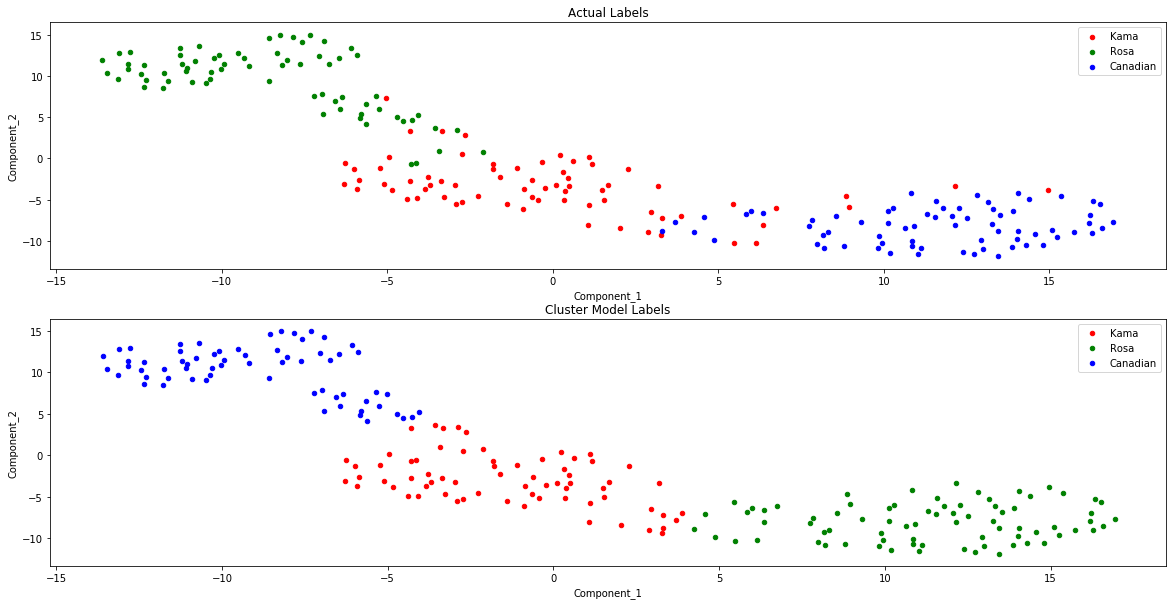

In [28]:
fig, ax = plt.subplots(2,1,figsize=(20,10))

scatter_plot_by_class(ax[0], features_2d, target)
scatter_plot_by_class(ax[1], features_2d, cluster_labels)
    
ax[0].set_title('Actual Labels')
ax[1].set_title('Cluster Model Labels');

### Single-Variable Logistic Regression

As we continue the exploration of this data set, we next to use single-variable logistic regression to assess the performance of each feature individually as a predictor of `seed_class`. Again, we go to Scikit-Learn for a simple implementation of the complex mathematical model, Logistic Regression. Logistic Regression is a regression model that creates the best linear separator of classes in a model. In other words, we seek the line or lines that best separates each target class from the others. 

We import the `LogisticRegression` class from the `sklearn.linear_model` library and instantiate the `lr_model` object.

In [29]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

Using a `for`-loop we iterate through each feature and use it to fit a logistic regression model on the data. We then score each of these models using Accuracy (the default scoring method for Scikit-Learn's classification models). The function `fit_and_score_lr_model_for_each_feature` from the `modeling.py` file included in our working directory performs this and returns the results as a `DataFrame`.

In [30]:
from modeling import fit_and_score_lr_model_for_each_feature

### Interpretation

From these results, we can see that `area` is the strongest predictor as a single variable, followed by `width_of_kernel`.

In [31]:
lm_scores_df = fit_and_score_lr_model_for_each_feature(lr_model, features, target)
lm_scores_df

,score
feature,
area,0.804762
width_of_kernel,0.728571
perimeter,0.719048
length_of_kernel,0.666667
length_of_kernel_groove,0.604762
asymmetry_coefficient,0.571429
compactness,0.509524


### Plotting the Decision Boundary

Armed with this new knowledge about the importance of the features, we can create a visualization of the decision boundary for a linear model on more than one feature. `visualization.py` includes a function `scatter_plot_with_decision_boundary` that can create such a visualization for us.

In [32]:
from visualization import scatter_plot_with_decision_boundary

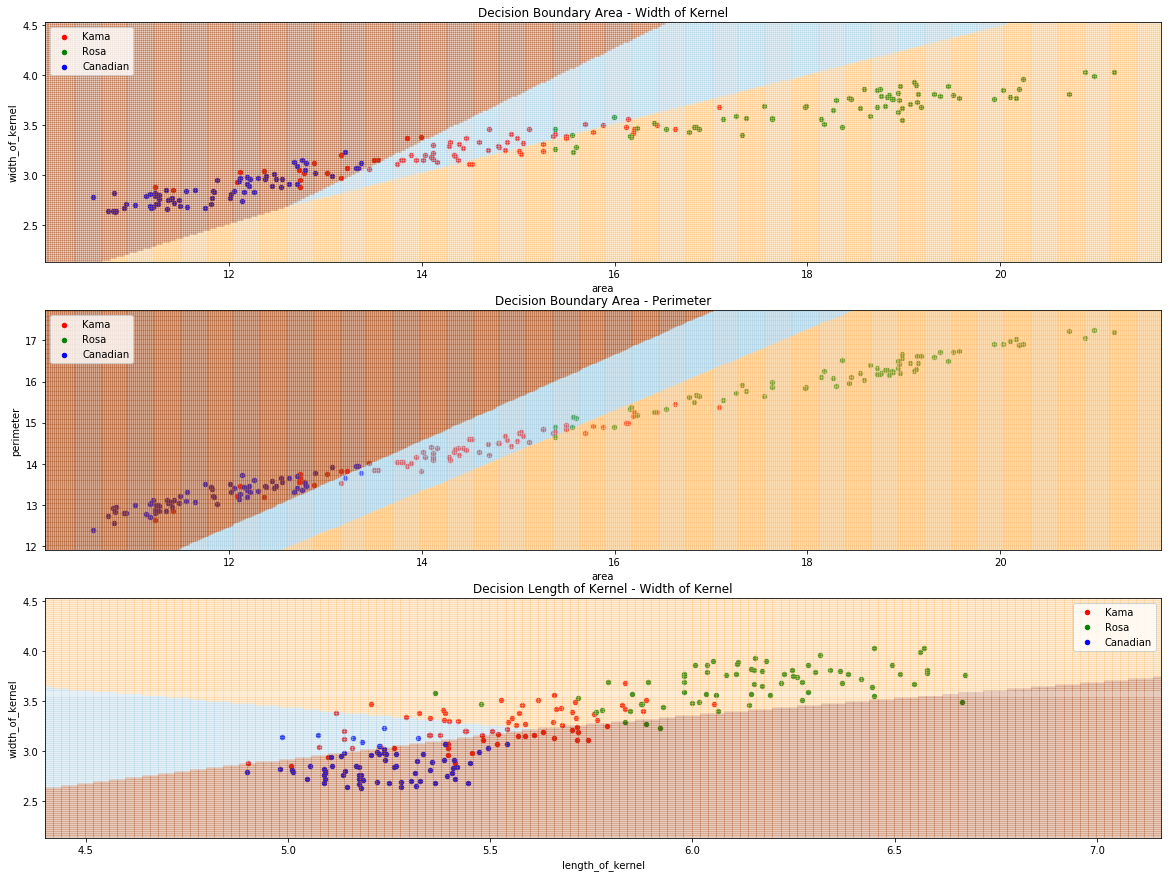

In [33]:
fig, ax = plt.subplots(3,1,figsize=(20,15))

scatter_plot_with_decision_boundary(ax[0], features, target, 'area', 'width_of_kernel')
scatter_plot_with_decision_boundary(ax[1], features, target, 'area', 'perimeter')
scatter_plot_with_decision_boundary(ax[2], features, target, 'length_of_kernel', 'width_of_kernel')

ax[0].set_title("Decision Boundary Area - Width of Kernel")
ax[1].set_title("Decision Boundary Area - Perimeter")
ax[2].set_title("Decision Length of Kernel - Width of Kernel");

## Modeling with a K Nearest Neighbors Classifier 

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, \
    X_test, \
    y_train, \
    y_test = train_test_split(features, target, random_state=10)

In [38]:
scores = []
for i in range(2,20):
    knc = KNeighborsClassifier(i)
    knc.fit(X_train, y_train)
    train_score = knc.score(X_train, y_train)
    test_score = knc.score(X_test, y_test)
    scores.append({
        'k' : i,
        'train_score' : train_score,
        'test_score' : test_score
    })
scores_df = pd.DataFrame(scores)
scores_df.set_index('k', inplace=True)
scores_df

,test_score,train_score
k,,
2,0.943396,0.961783
3,0.886792,0.961783
4,0.905660,0.936306
5,0.905660,0.917197
6,0.924528,0.917197
7,0.905660,0.910828
8,0.924528,0.910828
9,0.924528,0.917197
10,0.905660,0.917197


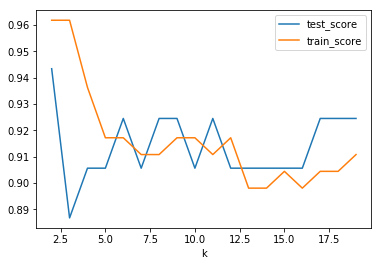

In [39]:
scores_df.plot()

In [40]:
scores = []
for i in range(1,10):
    knc = KNeighborsClassifier(i*2)
    knc.fit(X_train, y_train)
    train_score = knc.score(X_train, y_train)
    test_score = knc.score(X_test, y_test)
    scores.append({
        'k' : i*2,
        'train_score' : train_score,
        'test_score' : test_score
    })
scores_df = pd.DataFrame(scores)
scores_df.set_index('k', inplace=True)
scores_df

,test_score,train_score
k,,
2,0.943396,0.961783
4,0.905660,0.936306
6,0.924528,0.917197
8,0.924528,0.910828
10,0.905660,0.917197
12,0.905660,0.917197
14,0.905660,0.898089
16,0.905660,0.898089
18,0.924528,0.904459


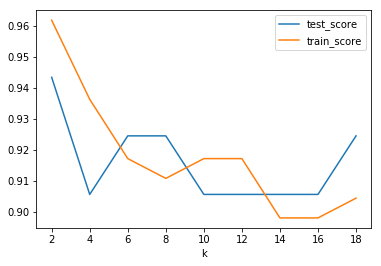

In [41]:
scores_df.plot()

In [42]:
best_features = list(lm_scores_df.index)

In [43]:
lr = LogisticRegression()
knc = KNeighborsClassifier(2)

X_train_df = pd.DataFrame(X_train)
X_train_df.columns = features.columns
X_test_df = pd.DataFrame(X_test)
X_test_df.columns = features.columns

final_performance_scores = []
for i in range(len(best_features)):
    knc = KNeighborsClassifier(2)
    feats = best_features[:i+1]
    lr.fit(X_train_df[feats], y_train)
    knc.fit(X_train_df[feats], y_train)    

    final_performance_scores.append({
        'features' : ' '.join(feats),
        'feature_added' : best_features[i],
        'lr_train_score' : lr.score(X_train_df[feats], y_train),
        'lr_test_score' : lr.score(X_test_df[feats], y_test),
        'knc_train_score' : knc.score(X_train_df[feats], y_train),
        'knc_test_score' : knc.score(X_test_df[feats], y_test)
    })

final_performance_scores_df = pd.DataFrame(final_performance_scores)
final_performance_scores_df.set_index('feature_added', inplace=True)
final_performance_scores_df

,features,knc_test_score,knc_train_score,lr_test_score,lr_train_score
feature_added,,,,,
area,area,0.886792,0.898089,0.660377,0.707006
width_of_kernel,area width_of_kernel,0.886792,0.923567,0.773585,0.783439
perimeter,area width_of_kernel perimeter,0.886792,0.904459,0.867925,0.859873
length_of_kernel,area width_of_kernel perimeter length_of_kernel,0.886792,0.917197,0.867925,0.853503
length_of_kernel_groove,area width_of_kernel perimeter length_of_kerne...,0.943396,0.942675,0.924528,0.917197
asymmetry_coefficient,area width_of_kernel perimeter length_of_kerne...,0.943396,0.961783,0.905660,0.923567
compactness,area width_of_kernel perimeter length_of_kerne...,0.943396,0.961783,0.905660,0.923567


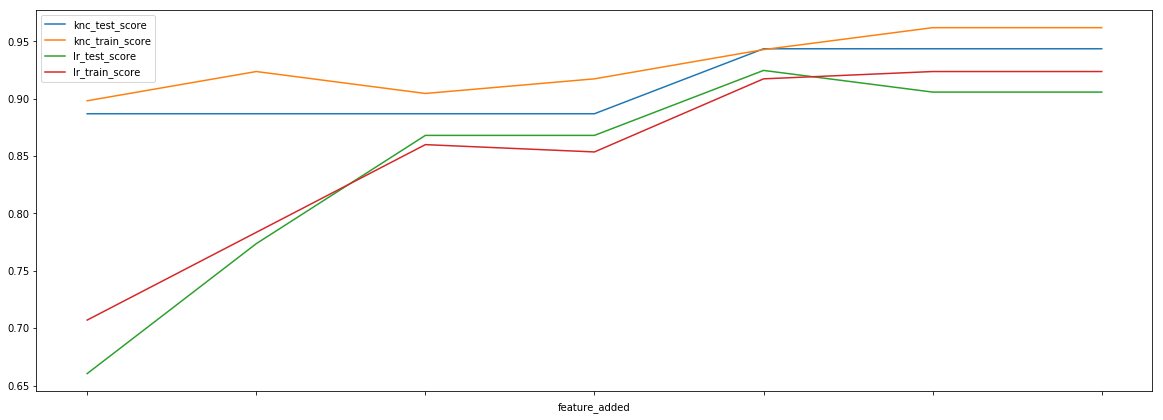

In [44]:
final_performance_scores_df.plot(rot=45, figsize=(20,7))